In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
sklearn.set_config(print_changed_only=True)
%matplotlib inline

# Gradient Boosting

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

grdbst = GradientBoostingClassifier(random_state=0)
grdbst.fit(X_train, y_train)

print("accuracy on training set: %f" % grdbst.score(X_train, y_train))
print("accuracy on test set: %f" % grdbst.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.965035


In [4]:
# setting the max_depth
grdbst = GradientBoostingClassifier(random_state=0, max_depth=1)
grdbst.fit(X_train, y_train)

print("accuracy on training set: %f" % grdbst.score(X_train, y_train))
print("accuracy on test set: %f" % grdbst.score(X_test, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.972028


In [5]:
# setting the learning_rate
grdbst = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
grdbst.fit(X_train, y_train)

print("accuracy on training set: %f" % grdbst.score(X_train, y_train))
print("accuracy on test set: %f" % grdbst.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.965035


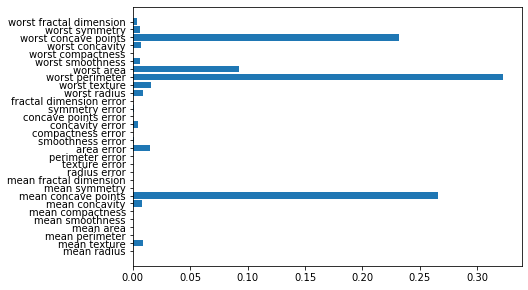

In [6]:
# plotting feature importances
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plt.barh(range(cancer.data.shape[1]), gbrt.feature_importances_)
plt.yticks(range(cancer.data.shape[1]), cancer.feature_names);
ax = plt.gca()
ax.set_position([0.4, .2, .9, .9])

#### Using the `xgboost` libraries Gradient Boosted Classifier

In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.979021


In [9]:
# tuning num_estimators (number of trees)
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)

print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.986014


# Exercise
Use GradientBoostingRegressor on the Bike dataset.
Search over the ``learning_rate`` and ``max_depth`` using ``GridSearchCV``.
What happens if you change ``n_estimators``?

Compare the speed of XGBClassifier with GradientBoostingRegressor. How well does XGBClassifier do with defaults on the ``Bike`` dataset? Can you make it do better?

In [14]:
# import data
data = pd.read_csv("data/bike_day_raw.csv")

X = data.drop("cnt", axis=1)
y = data.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


#### Tuning `learning_rate`

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'learning_rate': [0.15,0.1,0.05,0.01,0.005,0.001]}

grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
print('Best params: %s' % grid.best_params_)

Training set accuracy: 0.7630681009737128
Test set accuracy: 0.597381524454321
Best params: {'learning_rate': 0.05}


C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Tuning `max_depth`

In [17]:
param_grid = {'max_depth': range(5,16,2)}

grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
print('Best params: %s' % grid.best_params_)

Training set accuracy: 0.9502559831799464
Test set accuracy: 0.5865306308124792
Best params: {'max_depth': 5}


C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Tuning `n_estimators`

In [19]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}

grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
print('Best params: %s' % grid.best_params_)

Training set accuracy: 0.89635096309614
Test set accuracy: 0.6034356651082977
Best params: {'n_estimators': 200}


C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Talk about overfitting**

#### Using xgboost

In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000)
xgb.fit(X_train, y_train)

print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

C:\Users\jfields\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:26:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
accuracy on training set: 0.991930
accuracy on test set: 0.569227


**Overfitting!**